In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

# For notebook display
%matplotlib inline

In [8]:
# Load the image (replace with your image path)
image_path = './sample_images/1.jpg'  # Update this path as needed
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}. Please check the path.")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [9]:
# Initialize MSER detector
mser = cv2.MSER_create()
regions, _ = mser.detectRegions(gray)

In [10]:
# Create a mask for MSER regions
mask = np.zeros_like(gray)
for region in regions:
    x, y, w, h = cv2.boundingRect(region.reshape(-1, 1, 2))
    aspect_ratio = w / h
    if 1.5 < aspect_ratio < 6.0 and 30 < w < 300 and 10 < h < 100:  # Adjust based on plate size
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [11]:
mask = np.zeros_like(gray)

for region in regions:
    x, y, w, h = cv2.boundingRect(region.reshape(-1, 1, 2))
    aspect_ratio = w / h
    
    # Filter based on aspect ratio and size (adjust as needed)
    if 2.0 < aspect_ratio < 6.0 and 50 < w < 500 and 20 < h < 150:
        # Draw rectangle around potential plate
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

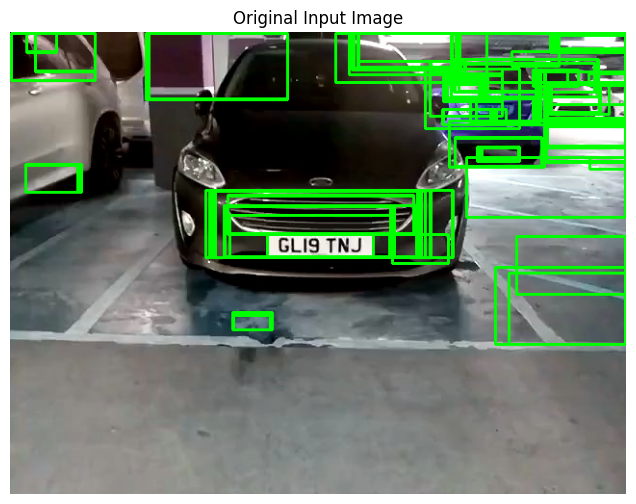

In [12]:
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.title('Original Input Image')
plt.axis('off')
plt.show()